In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df_train = pd.read_csv("../input/banking-dataset-classification/new_train.csv")
df_train


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
df_train.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
set(df_train.marital), set(df_train.month), set(df_train.y)

({'divorced', 'married', 'single', 'unknown'},
 {'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'},
 {'no', 'yes'})

## Preprocessing del train set

In [6]:
# I get yes as 0 and no as 1
if type(df_train.y.iloc[0]) == str:
    df_train['y'] = df_train['y'].apply(lambda x: 0 if x == "yes" else (1 if x == "no" else np.na))

In [7]:
def numerize(df, col,tuple):
    if type(df[col].iloc[0]) == str:
        df[col] = df[col].apply(lambda x: tuple.index(x))

In [8]:
week_days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
months = list(map(str.lower, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
numerize(df_train, 'day_of_week', week_days)
numerize(df_train, 'month', months)

In [9]:
poutcome = ('failure','nonexistent','success')
contact = ('cellular','telephone')
loan = ('no','yes','unknown')
numerize(df_train, 'poutcome', poutcome)
numerize(df_train, 'contact', contact)
numerize(df_train, 'loan', loan)

In [10]:
job=('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital=('divorced','married','single','unknown')   # note: 'divorced' means divorced or widowed)
education=('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default=('no','yes','unknown')
housing=('no','yes','unknown')
numerize(df_train, 'job', job)
numerize(df_train, 'marital', marital)
numerize(df_train, 'education', education)
numerize(df_train, 'default', default)
numerize(df_train, 'housing', housing)

In [11]:
set(df_train.poutcome), set(df_train.contact), set(df_train.loan)

({0, 1, 2}, {0, 1}, {0, 1, 2})

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32950 non-null  int64
 1   job          32950 non-null  int64
 2   marital      32950 non-null  int64
 3   education    32950 non-null  int64
 4   default      32950 non-null  int64
 5   housing      32950 non-null  int64
 6   loan         32950 non-null  int64
 7   contact      32950 non-null  int64
 8   month        32950 non-null  int64
 9   day_of_week  32950 non-null  int64
 10  duration     32950 non-null  int64
 11  campaign     32950 non-null  int64
 12  pdays        32950 non-null  int64
 13  previous     32950 non-null  int64
 14  poutcome     32950 non-null  int64
 15  y            32950 non-null  int64
dtypes: int64(16)
memory usage: 4.0 MB


In [13]:
df_train.dropna(inplace=True)
df_train.drop_duplicates(inplace=True)

### Outliers removal

In [14]:
from scipy.stats import zscore      # indica per ogni elemento a quante deviazioni std si trova lontano dl valore medio (se > 3 è un outlier)
z_scores = np.abs(zscore(df_train, axis=0))
#print(z_scores, z_scores.shape, type(z_scores))
df_train_filter_map = (z_scores < 4).all(axis=1)

df_train_filtered = df_train[df_train_filter_map]               # whole
df_y = df_train_filtered['y']                                   # train y 
df_x = df_train_filtered.drop(['y'], axis=1)
df_x                                             # train x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,2,0,0,0,10,2,227,4,999,0,1
1,37,2,1,6,0,0,0,1,10,2,202,2,999,1,0
2,78,5,1,0,0,0,0,0,6,0,1148,1,999,0,1
3,36,0,1,6,0,1,0,1,4,0,120,2,999,0,1
4,59,5,0,6,0,0,0,0,5,1,368,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,6,1,192,1,999,0,1
32946,52,9,1,5,0,1,0,0,10,4,64,1,999,1,0
32947,54,0,1,2,0,0,1,0,6,0,131,4,999,0,1
32948,29,0,1,6,0,0,0,1,4,4,165,1,999,0,1


### Scaling & PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(df_x)
df_scaled_x = pd.DataFrame(scaler.transform(df_x), columns=df_x.columns)
df_scaled_x


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,0.914218,-0.752363,-0.277768,-0.812780,1.899530,-1.055560,-0.439157,-0.775204,2.197784,0.014459,-0.078496,0.823924,0.0,-0.329008,0.340866
1,-0.286782,-0.473680,-0.277768,1.062884,-0.526521,-1.055560,-0.439157,1.289983,2.197784,0.014459,-0.195467,-0.194173,0.0,2.585532,-2.933708
2,3.816635,0.362370,-0.277768,-1.750612,-0.526521,-1.055560,-0.439157,-0.775204,0.211351,-1.399160,4.230721,-0.703222,0.0,-0.329008,0.340866
3,-0.386865,-1.031046,-0.277768,1.062884,-0.526521,0.790805,-0.439157,1.289983,-0.781866,-1.399160,-0.579132,-0.194173,0.0,-0.329008,0.340866
4,1.915051,0.362370,-1.926528,1.062884,-0.526521,-1.055560,-0.439157,-0.775204,-0.285257,-0.692350,0.581221,-0.194173,0.0,-0.329008,0.340866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30938,-1.187532,0.919737,1.370992,-0.343864,-0.526521,0.790805,-0.439157,-0.775204,0.211351,-0.692350,-0.242256,-0.703222,0.0,-0.329008,0.340866
30939,1.214468,1.477103,-0.277768,0.593968,-0.526521,0.790805,-0.439157,-0.775204,2.197784,1.428078,-0.841148,-0.703222,0.0,2.585532,-2.933708
30940,1.414635,-1.031046,-0.277768,-0.812780,-0.526521,-1.055560,1.748707,-0.775204,0.211351,-1.399160,-0.527665,0.823924,0.0,-0.329008,0.340866
30941,-1.087448,-1.031046,-0.277768,1.062884,-0.526521,-1.055560,-0.439157,1.289983,-0.781866,1.428078,-0.368584,-0.703222,0.0,-0.329008,0.340866


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
df_x_ready = pca.fit_transform(df_scaled_x)
df_x_ready, df_x_ready.shape

(array([[-0.58850323,  1.17842517,  1.55588221, ..., -1.79598292,
          0.3172441 ,  0.6852213 ],
        [ 3.50637733,  0.51019919, -0.20987961, ..., -0.17294504,
          0.20220124, -0.27770115],
        [-0.54244178,  2.30242799,  1.72884673, ...,  1.6280873 ,
         -1.23744711,  2.47078073],
        ...,
        [-0.42708979,  0.85592848,  1.08123921, ..., -1.48917069,
         -1.09464358,  0.35106995],
        [-0.69609258, -0.60624901, -1.52869282, ...,  0.10669791,
          1.37333262, -1.14198714],
        [-0.78568005, -0.42259336, -0.62570147, ...,  0.32804872,
         -0.45031112,  0.98344303]]),
 (30943, 8))

In [17]:
df_y

0        1
1        1
2        0
3        1
4        1
        ..
32945    1
32946    1
32947    1
32948    1
32949    1
Name: y, Length: 30943, dtype: int64

## Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
rfc = RandomForestClassifier(max_depth=4, random_state=42, n_estimators=150)
lr = LogisticRegression(random_state=42)
dc = DummyClassifier(random_state=42, strategy="most_frequent").fit(df_x_ready, df_y)

rfc.fit(df_x_ready, df_y)
lr.fit(df_x_ready, df_y)

LogisticRegression(random_state=42)

In [20]:
rfc.score(df_x_ready, df_y), lr.score(df_x_ready, df_y), dc.score(df_x_ready, df_y)

(0.9125165627120835, 0.9162653912031801, 0.912290340303138)

In [21]:
df_x = df_x.drop(['pdays', 'previous'], axis=1)     # test data doesn't have these columns
df_x.shape, df_y.shape

((30943, 13), (30943,))

In [22]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA()), ('rfc', RandomForestClassifier())])
params = { 'pca__n_components':(12, 15), 'rfc__max_depth':( 12, 15, 30), 'rfc__n_estimators':(50, 100)}
search = GridSearchCV(pipe, params, n_jobs=-1)
search.fit(df_x, df_y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': (12, 15),
                         'rfc__max_depth': (12, 15, 30),
                         'rfc__n_estimators': (50, 100)})

In [23]:
search.best_score_, search.best_params_

(0.9141648239891802,
 {'pca__n_components': 12, 'rfc__max_depth': 15, 'rfc__n_estimators': 100})

## KNN Pipeline

In [24]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scaler', StandardScaler()),('pca', PCA()),('knn', KNeighborsClassifier())])
knn_params = {'pca__n_components': (10,11, 13),'knn__n_neighbors':(1,2)}
search_knn = GridSearchCV(pipe_knn, knn_params, n_jobs=-1)
search_knn.fit(df_x, df_y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': (1, 2),
                         'pca__n_components': (10, 11, 13)})

In [25]:
search_knn.best_score_, search_knn.best_params_

(0.8874702578745804, {'knn__n_neighbors': 1, 'pca__n_components': 13})

In [26]:
pipe_knn.fit(df_x, df_y)
pipe_knn.score(df_x, df_y)

0.9301942280968232

In [27]:
df_test = pd.read_csv("../input/banking-dataset-classification/new_test.csv")
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1
8235,33,7,1,3,0,0,0,0,4,1,472,1,0
8236,44,1,1,1,0,2,2,1,6,1,554,5,1


In [28]:
test_preds = pipe_knn.predict(df_test)
test_preds_text = np.array(list(map(lambda x : 'yep' if x==0 else 'nope', test_preds)))
print(test_preds_text)
test_preds = pd.DataFrame(test_preds)

['nope' 'nope' 'yep' ... 'nope' 'nope' 'nope']


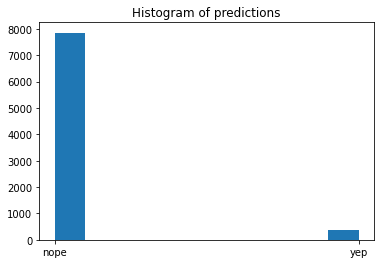

In [29]:
plt.hist(test_preds_text)
plt.title("Histogram of predictions")
plt.show()

In [30]:
test_preds.columns = ['y']
test_preds

,y
0,1
1,1
2,0
3,1
4,1
...,...
8233,1
8234,1
8235,1
8236,1


In [31]:
test_preds.to_csv('submission.csv', index=False)